## 简答题
### 请谈谈Python中is 和 == 的区别(写代码演示)

**is作用：**  
* is 表示的是对象标示符（object identity），作用是用来检查对象的标示符是否一致，也就是比较两个变量/对象在内存中的地址是否一样。

**==作用：**  
* ==用于比较两个变量的值是否相等,== 表示的是相等（equality），是用来检查两个对象是否相等。

**总结：**
* is ：检查两个对象是否指向同一块内存空间
* == ：检查他们的值是否相等

可以看出，is 是比 == 更严格的检查，is 返回True表明这两个对象指向同一块内存，值也一定相同。

In [49]:
# case 1:对于（比较小）数值型和（比较短）字符串型对象, python的存储机制使得a和b其实指向同一个地址，所以is和==都是True
a_num = 123
b_num = 123
a_str = 'string'
b_str = "string"
# 地址：
print("a_num == b_num:", a_num == b_num)
print("a_str == b_str:", a_str == b_str)
# 值：
print("a_num is b_num:", a_num is b_num)
print("a_str is b_str:", a_str is b_str)
print('\n')

# case 2:对于list、tuple等容器，a和b虽然内容一样，但是是两个不同的对象引用，指向两个不同的内存地址
a_tuple = (1,2,3)
b_tuple = (1,2,3)
a_list = [1,2,3]
b_list = [1,2,3]
# 地址：
print("a_tuple is b_tuple:", a_tuple is b_tuple)
print("a_list is b_list:", a_list is b_list)
# 值：
print("a_tuple == b_tuple:", a_tuple == b_tuple)
print("a_list == b_list:", a_list == b_list)
print('\n')

# case 3：实际上可以通过修改对象的__eq__方法改变==的比较方式：自定义一个类，定义两个相同的实例，并尝试重写__eq__方法让==一定返回False
class Student(object):
    "改变__eq__方法，使得==返回值一定为False"
    def __init__(self, name, age):
        self.name = name
        self.age = age
#     注意：以下的self是当前自身的实例化对象，而other则是其他实例化对象：如果当前对象名与其他对象名相等，或者当前对象age与其他age相等
    def __eq__(self, other):
        if self.name == other.name or self.age == other.age :
            return False
        
S1 = Student('xiaoming',16)
S2 = Student('xiaoming',16)

print(S1.name)
print(S2.name)

print(id(S1))
print(id(S2))

print(S1==S2)

a_num == b_num: True
a_str == b_str: True
a_num is b_num: True
a_str is b_str: True


a_tuple is b_tuple: False
a_list is b_list: False
a_tuple == b_tuple: True
a_list == b_list: True


xiaoming
xiaoming
4489081016
4489081912
False


#### 参考答案

is用于比较两个变量是否引用了同一个内存地址 is 表示的是对象标示符（object identity），作用是用来检查对象的标示符是否一致，也就是比较两个对象在内存中的地址是否一样。

==用于比较两个变量的值是否相等,== 表示的是相等（equality），是用来检查两个对象是否相等。

is 是检查两个对象是否指向同一块内存空间，而 == 是检查他们的值是否相等。

可以看出，is 是比 == 更严格的检查，is 返回True表明这两个对象指向同一块内存，值也一定相同。

In [491]:
# case 1:对于数值型和字符串型对象, python的存储机制使得a和b其实指向同一个地址，所以is和==都是True
a = 5
b = 5
print('a is b:', a is b)
print('a == b:', a == b)
print('id(a):%s\nid(b):%s'%(id(a),id(b)))
print('\n')

# case 2:对于list、tuple等容器，a和b虽然内容一样，但是是两个不同的对象引用，指向两个不同的内存地址
a = [1,2,3]
b = [1,2,3]
print('a is b:', a is b)
print('a == b:', a == b)
print('id(a):%s\nid(b):%s'%(id(a),id(b)))
print('\n')

# case 3：实际上可以通过修改对象的__eq__方法改变==的比较方式
class Student():
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __eq__(self, other):
#         return self.name == other.name
        return False
s1 = Student('David',18)
s2 = Student('David',20)
# 因为age不相同，很显然s1和s2是两个不同内容的对象，但是通过改写__eq__可以只通过比较名字来判断是否==
print('s1 is s2:', a is b)
print('s1 == s2:', a == b)
print('id(s1):%s\nid(s2):%s'%(id(s1),id(s2)))

a is b: True
a == b: True
id(a):4442392016
id(b):4442392016


a is b: False
a == b: True
id(a):4625350280
id(b):4625349448


s1 is s2: False
s1 == s2: True
id(s1):4489692888
id(s2):4625465528


### Python中的高阶函数是指什么？

提示：我们指的是map、reduce、filter这类函数

高阶函数：能够接收函数作为参数的方法

计算处理型：  
* map：Python内置的映射函数，接收一个单参函数f(a)和一个list，将函数f以此作用在list的每个元素，将结果输出到一个新的list返回，是单个元素处理。
* reduce：与map()类似，但接收一个双参函数f(a,b)和一个list，处理时将一对数据输入函数f，第一个参数为上次函数返回值，第二个参数为list中下一个需要处理的值，两个参数共同输入函数f得到下一个结果。

规则逻辑判断型：  
* filter：接收一个函数f和一个list，函数f返回值为布尔值，filter将返回值为True的值提取出来，作为结果list返回。

#### 参考答案
高阶函数属于函数式编程中的一个概念。在python中函数是一个对象，这意味着可以使用其他变量引用函数。

python里的高阶函数，即接受函数作为参数的函数。

* python中的常用的高阶函数有：
    * map: 可理解为对数据的做一对一映射
    * reduce: 可理解为对数据做多对一的映射
    * filter: 对数据进行逐个过滤，仅保留符合条件的元素


### Python类中有哪些的成员，如何分类他们，他们各自又有哪些用途？

提示：成员变量，成员函数...

* 成员变量  
    * 类变量：
        * 说明：定义在类中，但在类方法之外的变量
        * 作用：是所有对象共有的方法
    * 实例变量/实例属性：
        * 说明：定义在init方法中的变量
        * 作用：每个对象都会有属于自己的不同属性值
        
    * **举例：**
        * 说明：虽然每个成员的名称和区号不同（实例变量），但是它们的共同属性是都属于中国（类变量共享属性）。  
        定义一个类，即在内存中开辟了空间，类也是对象（类对象）。类对象是模板，实例对象是通过模板的具体化。<font color='red'>创建对象即开辟空间：对该空间用__init__()初始化，并用self指向创建的空间，赋值。</font>
        ![](./class.png)
        * 实例对象使用__class__指向类对象
        ```
        class A:
            country="中国"

            def __init__(self,a,b):
                self.a=a
                self.b=b

        a = A("吉林省长春市","0431")
        b = A("北京市","010")

        print(a.a)  #实例变量
        print(b.a)

        print(a.country) #实例读取类变量（但一般类变量用类获取，实例变量用实例获取，此处应该是print(A.country)）
        print(b.country)
        ```
        **注意**：  
        * 如果修改`a.country="xxx"`，并没有改变类变量country的值，而是在a的空间中新建了一个country的属性，值为xxx。后来再通过a.country访问的空间是a所在的实例对象的变量，而不是类对象中的变量。（总结：如果访问一个实例属性，但是在实例对象中没有，就会根据__class__所指向的类去类属性中寻找。）
        * 但是，如果通过`a.__class__.country="xxx"`就会在实例对象中修改类变量，但是这种方法是小路，正规方法是：通过类方法去修改类属性。


* 成员函数
    * 实例方法：
        * 说明：类对象中修改实例变量的方法(self)，调用此方法时，指向相应实例对象空间。
        * 调用格式：
        ```
        def instance_func(self, ...):
            return ...
        ```
    * 类方法：
        * 说明：类对象中修改类变量的方法，调用此方法时，指向类对象空间。       
        * 调用格式：
        ```
        @classmethod
        def class_func(cls, ...):
            return ...
        ```
    * 静态方法：
        * 说明：类对象中的普通函数（放在与类并列的位置功能相同），只是封装起来供自己类调用相关方法时更方便，与其他类的同名函数相隔离，避免冲突。使用`@staticmethod`装饰器只是为了防止解释器传入类对象/实例对象引用。
        * 调用格式：
        ```
        @staticmethod
        def static_func(...):
            return ...
        # 调用时使用
        self.static_func()
        ```
    * 注意：<u>实例对象</u>可以调用**类方法，实例方法，静态方法**。但是<u>类对象</u>只能调用**类方法和静态方法**。
        * 类对象（负责定义）
            * 类变量
            * 所有方法
                * 实例方法self
                * 类方法cls
                * 静态方法
        * 实例对象（使用时根据传参不同 去调用）
            * 实例变量
            * 类对象指针

In [53]:
class A:
    country="中国"

    def __init__(self,a):
        self.a=a

a = A("吉林省")
b = A("河南省")

print(a.a)  #实例变量
print(b.a)

print(a.country) #实例读取类变量
print(b.country)

吉林省
河南省
中国
中国


#### 参考答案

* 数据成员
    * 类变量 : 在类中且函数体之外,实例之间共享
    * 实例变量 : 定义在init方法中,作用于当前实例的类
* 方法成员
    * 类方法 : 用@classmethod装饰器,第一个参数为cls
    * 实例方法 : 绑定到实例的方法, 第一个参数为self
* 静态方法 :
    > 1.用@staticmethod装饰器  
    > 2.没有cls self参数限制  
    > 3.可以类名访问,也可以实例访问  


### Python中列表，元组的相同之处及区别都有哪些？集合与字典呢？

* 列表与元组
    * 相同
        * 都是容器，也都是序列（有序的）
        * 都可以存储任何数据类型
        * 可以通过索引访问
    * 区别
        * 创建符号不同，列表[]，元组()
        * 列表可变，元组不可变。可以使用元组作为字典的key
        
* 集合与字典
    * 相同
        * 都可以修改，可读可写
        * 都不能有重复的key值，且key应该为不可改变的对象
        * 存储元素都是无序的
    * 区别
        * set是一组只有key的集合，dict由键值对组成
        * set不可以有重复值，而dict可以重复

#### 参考答案
* 列表与元组

    * 相同点：
        * 列表与元组都是容器，是一系列的对象
        * 都可以包含任意类型的元素甚至可以是一个序列，还可以包含元素的顺序
    * 不同点：
        * 列表是可变的，而元组是不可变的，tuple 不可追加，tuple大小不可再改变。
        * 不能把列表当做字典的关键字，因为只有不可变的值才能进行哈希运算，因此只有不可变的值才能作为关键字。要使用列表做关键字，你需要把它转化为元组

* 集合与字典

    * 相同点：
        * dict和set当中都没有重复的key值，且key值必须是不可改变的对象。
        * 两者存储的元素都是无序的。
    * 不同点：
        * set是一组key的集合，但不存储value；
        * dict使用键-值（key-value）存储，具有极快的查找速度。


### Python中的模块和包是什么，如何自定义并使用？

提示：可检索“python模块”和“python包”关键词。

** 1.介绍：**
* **Python模块**：一个python文件就是一个模块，用来封装反复调用的常量、变量、函数、类等。可以被其他python文件(模块)使用`import`关键词导入并使用。
* **Python包**：包含多个python模块，并且有`__init__.py`声明文件的文件夹，称为python模块包，用来管理功能大量彼此相关的python模块，也可以使用`import`导入并使用。
* 作用：通过有效整理代码，提高代码复用性，也方便其他模块进行访问

** 2.定义： **
* ** 模块定义：**  

<font color=#FF0000>定义`utils.py`模块</font>

```
# coding:utf-8
# 测试变量
test_msg = "hello"

# 测试函数
def test_func():
    print("test 函数操作")

# 测试类
class Test:
    pass
```

<font color=#FF0000>同目录下，定义`main.py`模块</font>

```
from . import utils

# utils.py模块被调用时，会自动执行该模块所有代码。但是如果加"__main__"入口，就不会在引入模块时运行main中的代码。（也被称为测试代码）
if __name__ == "__main__":

    # 调用变量
    print(utils.test_mag)

    # 调用函数
    utils.test_func()

    # 调用类
    t = utils.Test()

```

* ** 包定义：**  

<font color=#FF0000>定义`packages`包</font>  

文件目录：  
```
  ./test
    /packages/  
      __init__.py  
      utils.py  
    main.py
    ...
```

<font color=#FF0000>定义packages包中所有指定模块`__init__.py`</font>  

```
__all__ = ['utils.py','others module'...]
```

** 3.导入方法：**
* **import 包名/模块名**

```
import packages/modules
import packages.modules
import packages.modules.function
import packages.modules.class as np

# 以下用modules做演示
modules.variable
modules.function()
modules.class
```

**路径检查方式**：当前文件夹，系统环境变量PYTHONPATH，系统路径sys.path中查询是否存在该名称的包/模块

* **from 包名/模块名 import 具体对象**

```
# 从当前路径引入modules
from . import modules

# 从上层路径引入modules
from .. import modules

# 从包中导出模块
from packages import modules

# 从模块中导出变量，函数，类
from packages.modules import vars, func, class
from packages.modules import class as np
```

参考：http://www.imooc.com/article/247114

#### 参考答案

* 模块
    * 一个模块就是一个.py文件，里面定义了可以复用的函数和变量，当需要复用的时候就import导入进来进行复用
    * 自定义：创建一个.py文件就是文件名就是模块名称
    * 使用：使用import导入进来使用，搜索目录有当前路径、Bif中查找、安装路径、PYTHONPATH环境变量路径，找到该模块则可以导入并使用模块名.方法名的方式调用模块中的方法
* 包
    * 就是多个模块或着多个包的集合（文件夹），避免由于开发者多而可能造成的模块命名重复，所以用包来统一管理模块
    * 自定义：给多个模块创建一个文件夹，文件夹内可以有模块（.py文件）或者文件夹（子包），并且需要包含一个init.py文件，用来做一些初始化工作和避免被解释器当作普通字符串
* 使用：
    * 同样是使用import的方式导入到当前脚本中

## 代码题

### 创建一个函数，接收一个字符串参数，判断其做为Python标识符是否合法。

具体要求： 
- 如果合法则输出 True，否则输出 False。
- 如果该字符串与Python内置的关键字，或Bifs冲突，则打印'conflict'
- 注:Python标识符的规则，关键字和Bifs可搜索得到

Bifs--内置函数：

```
查看： dir(_builtins_)
IO：print(), open(), input()
列表与帮助：dir()与help()
类型与身份：type()，id()，memoryview（）,isinstance(), issubclass(),
数学运算类：sum,pow,round,min,max,hash等
类型转换：int,bin,hex,oct,str,float,list,bytes等
序列： len(), range(), zip(), map(),reduce(),filter(), reversed() , sorted(), enumerate()

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'SyntaxWarning', 'SystemError', 'SystemExit', 'TabError', 'TimeoutError', 'True', 'TypeError', 'UnboundLocalError', 'UnicodeDecodeError', 'UnicodeEncodeError', 'UnicodeError', 'UnicodeTranslateError', 'UnicodeWarning', 'UserWarning', 'ValueError', 'Warning', 'ZeroDivisionError', '__IPYTHON__', '__build_class__', '__debug__', '__doc__', '__import__', '__loader__', '__name__', '__package__', '__spec__', 'abs', 'all', 'any', 'ascii', 'bin', 'bool', 'bytearray', 'bytes', 'callable', 'chr', 'classmethod', 'compile', 'complex', 'copyright', 'credits', 'delattr', 'dict', 'dir', 'display', 'divmod', 'enumerate', 'eval', 'exec', 'filter', 'float', 'format', 'frozenset', 'get_ipython', 'getattr', 'globals', 'hasattr', 'hash', 'help', 'hex', 'id', 'input', 'int', 'isinstance', 'issubclass', 'iter', 'len', 'license', 'list', 'locals', 'map', 'max', 'memoryview', 'min', 'next', 'object', 'oct', 'open', 'ord', 'pow', 'print', 'property', 'range', 'repr', 'reversed', 'round', 'set', 'setattr', 'slice', 'sorted', 'staticmethod', 'str', 'sum', 'super', 'tuple', 'type', 'vars', 'zip']

```

Python内置的关键字：

`print(keyword.kwlist)`

```
['False', 'None', 'True', 'and', 'as', 'assert', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']
```

In [220]:
import keyword,string
import re

def Identifier(s):
    kw = keyword.kwlist #内置关键字
    bifs = dir(__builtins__) # Bifs
    #请用if-else完成检测，打印conflict或者False
    #your code here
    if s in kw or s in bifs:
        print('conflict')
    elif re.match('.*\W+.*', s):
        print('False')        
    elif re.match('[a-zA-Z_]\w*', s):
        print('True')
    else:
        print('False')
    return None

Identifier('while')
Identifier("a#bc")
Identifier("1a")
Identifier("number_var")

conflict
False
False
True


#### 参考答案

In [492]:
import keyword,string

def Identifier(s):
    kw = keyword.kwlist
    if s in kw or s in dir(__builtins__): 
        print("conflict")
    elif s.isidentifier(): # isidentifier() 可用来判断变量名是否合法
        print("True")
    else:
        print("False")

Identifier("list")
Identifier("abc#")
Identifier("1a")

conflict
False
False


### 编写一个函数，能生成包含20个随机整数的列表，然后将前10个元素升序排列，后10个元素降序排列，并分别打印输出
提示：本题考察对列表的切片和排序操作，注意切片下标。

In [234]:
import random
def sort2part():
    # 用random生成20个随机数并完成本题要求
    #your code here
    generate_list = []
    sorted_list = []
    for i in range(20):
        generate_list.append(int(random.random()*100))
    print("generate_list:", generate_list)
    sorted_list = sorted(generate_list[0:10])
    sorted_list += sorted(generate_list[11:], reverse=True)
    print("sorted_list:", sorted_list)
    return None

sort2part()

generate_list: [14, 79, 37, 95, 83, 20, 54, 59, 85, 82, 5, 88, 76, 41, 5, 97, 75, 94, 42, 72]
sorted_list: [14, 20, 37, 54, 59, 79, 82, 83, 85, 95, 97, 94, 88, 76, 75, 72, 42, 41, 5]


#### 参考答案

In [493]:
import random
def sort2part():

    ran_list = []

    for i in range(20):
        ran_list.append(random.randint(0,100))

    ran_list_pre_10 = ran_list[0:10]
    ran_list_pre_10.sort()
    ran_list_last_10 = ran_list[10::]
    ran_list_last_10.sort(reverse=True)

    print("前十个随机数 升序: "+ str(ran_list_pre_10))
    print("后十个随机数 降序: " + str(ran_list_last_10))

sort2part()

前十个随机数 升序: [8, 20, 22, 32, 37, 62, 66, 91, 92, 97]
后十个随机数 降序: [94, 93, 69, 67, 61, 60, 55, 53, 18, 4]


### 有一分数序列为：2/1，3/2，5/3，8/5，13/8，21/13,请使用Python代码出生成并打印该数列的前30项并求和返回
提示：观察分数的分子和分母，每1项都和前2项有关系，也可检索“斐波那契数列”

In [262]:
def fab(max): 
    # 完成分子分母的生成并计算求和返回结果
    # your code here
    fib = []
    frac = []
    temp = 0
    a,b = 1,2
    for i in range(max+1):
        fib.append(a)
        a,b = b,a+b
#     print(fib)
    
    for j in range(max):
        temp = fib[j]/fib[j+1]
        frac.append(temp)
    return sum(frac)

print("该数列的前30项和: ",fab(30))

该数列的前30项和:  18.458634675922156


#### 参考答案

In [494]:
def fab(max): 
    n, a, b = 0, 2, 1 
    result = 0
    while n < max: 
        print("%d/%d"%(a,b))
        result += a/b
        a, b = a + b, a
        n += 1
    return result

print("该数列的前30项和: ",fab(30))

2/1
3/2
5/3
8/5
13/8
21/13
34/21
55/34
89/55
144/89
233/144
377/233
610/377
987/610
1597/987
2584/1597
4181/2584
6765/4181
10946/6765
17711/10946
28657/17711
46368/28657
75025/46368
121393/75025
196418/121393
317811/196418
514229/317811
832040/514229
1346269/832040
2178309/1346269
该数列的前30项和:  48.84060068717216


### BMI编写
身体质量指数（BMI）是根据人的体重和身高计算得出的一个数字，BMI是可靠的身体肥胖指标，其计算公式：BMI=Weight/High2，其中体重单位为公斤，身高单位为米。

- 计算公式为：$BMI=体重（kg）÷身高^2（m）$

- 提示用户输入体重（kg）和身高的数字(m)(注意单位），然后计算BMI。

- 根据BMI指数范围，定义当前健康状态。BMI指数在18至25之间定义为健康的标准体重,小于该范围定义为偏瘦，超过该范围定义为偏重。

- 将BMI指数和其所代表状态输出 

In [274]:
weight = float(input('请输入您的体重(kg)：'))
high = float(input('请输入您的身高(m)：'))
# 完成BMI计算并返回结果提示信息
# your code here
bmi_value = weight/(high**2)
print("您的BMI值为：%s"%bmi_value)
if bmi_value >=25:
    print("健康状态为：偏重")
elif bmi_value < 18:
    print("健康状态为：偏瘦")
else:
    print("健康状态为：标准体重")

请输入您的体重(kg)：95
请输入您的身高(m)：1.8
您的BMI值为：29.320987654320987
健康状态为：偏重


#### 参考答案

In [497]:
weight = float(input('请输入您的体重：'))
high = float(input('请输入您的身高：'))
BMI = weight / (high**2)
weight_result = "健康的标准体重"

if BMI > 25:
    weight_result = "偏重"
elif BMI < 18:
    weight_result = "偏瘦"
else:
    pass
    
print('您的BMI指数为%.2f，您的体重为%s'%(BMI,weight_result))

请输入您的体重：95
请输入您的身高：1.8
您的BMI指数为29.32，您的体重为偏重


### 字符统计
- 创建一个函数，接收字符串输入，分别统计出其中英文字母、空格、数字和其它字符的个数后打印。
- 提示：
  - ord('a') 能将字符 'a' 转化为 ASCII 码表上对应的数值，
  - 例如，空格为32  
  - 数字 0-9 对应的码值为 48-57
  - 大写字母 A-Z 对应 65-90
  - 小写字母 a-z 对应 97-122
  - 比122高的都是其它。

In [334]:
def num_count(x):
    return x>=48 and x<=57

def char_count(x):
    return (x>=65 and x<=90) or (x>=97 and x<=122)

def other_count(x):
    return x>122

def str_count(s):  
    # 完成对应要求的统计，并返回对应的数量
    # your code here
    str_list = list(s)
    # 用列表推导式一次性取出ASCII码：
    ascii_num = [ord(item) for item in str_list]
    count_s = ascii_num.count(32)
    count_z = len(list(filter(num_count, ascii_num)))
    count_a = len(list(filter(char_count, ascii_num)))
    count_o = len(list(filter(other_count, ascii_num)))

    print("空格个数：%d个"%count_s)  
    print("数字个数：%d个"%count_z)
    print("英文字母个数：%d个"%count_a)
    print("其他字符个数：%d个"%count_o)  # 题目要求这里比122高的都是其它
    
str_count("我是xiao ming ming,今年27岁")

空格个数：2个
数字个数：2个
英文字母个数：12个
其他字符个数：5个


#### 参考答案

In [498]:
def str_count(s):  
    count_a=count_z=count_o=count_s=0  
    for i in s:  
        if (ord(i)>=97 and ord(i)<=122) or (ord(i)>=65 and ord(i)<=90):  
            count_a=count_a+1  
        elif ord(i)>=48 and ord(i)<=57:  
            count_z=count_z+1  
        elif ord(i)==32:  
            count_s=count_s+1  
        else:  
            count_o=count_o+1  
    print("空格个数：%d个"%count_s)  
    print("数字个数：%d个"%count_z)
    print("英文字母个数：%d个"%count_a)
    print("其他字符个数：%d个"%count_o)  
    
str_count("我是wei guo ying,今年27岁")

空格个数：2个
数字个数：2个
英文字母个数：10个
其他字符个数：6个


### 创建一个函数，可以将去除给定列表中中相邻且重复的元素(只保留一个)后，打印输出结果。
- 说明
  - 输入参数为 l1=[1,2,3,4,4,4,4,4,4,5,6,6,8,8,12,12,12,12,13]
  - 操作后，保证原有整体排序不变，仅处理相邻且重复的元素
  - 请勿使用set，否则该题不计分。

In [341]:
def remove_same(ll):
    # 完成题目要求的任务，并返回结果
    # your code here
    temp = []
    for i in range(len(ll)):
        if ll[i] in temp:
            continue
        else:
            temp.append(ll[i])
    ll = temp.copy()
    return ll

lst=[1,2,3,4,4,4,4,4,4,5,6,6,8,8,12,12,12,12,13]

print(remove_same(lst))

[1, 2, 3, 4, 5, 6, 8, 12, 13]


#### 参考答案

In [499]:
def remove_same(ll):
    cur = ll[0]
    remove_data = []
    for i in range(1,len(ll)):
        if cur == ll[i]:
            remove_data.append(ll[i])
        else:
            cur = ll[i]
    for j in range(len(remove_data)):
        ll.remove(remove_data[j])
    return ll

lst=[1,2,3,4,4,4,4,4,4,5,6,6,8,8,12,12,12,12,13]

print(remove_same(lst))

[1, 2, 3, 4, 5, 6, 8, 12, 13]


### 创建一个函数，接收一个由整数组成的列表（需对输入列表做检查，长度最少为2,数据类型为整型），并检验后下列条件后输出：
- 如列表是升序排列的,则输出"ASC";   
- 如列表是降序排列的,则输出"DESC";   
- 如列表无序，则输出"WRONG"。   

In [441]:
def check_data(l):
    # 请完成题目要求的任务，并输出对应信息
    # your code here
    if len(l)<2 or False in[isinstance(item, int) for item in l]:
        print("Don't meet the requirement.")
    else:
        if l==sorted(l):
            print("ASC")
        elif l==sorted(l, reverse = True):
            print("DESC")
        else:
            print("WRONG")
    
check_data([1])
check_data([1,"2"])
check_data([1,2,3,4])
check_data([4,3,2,1])
check_data([1,3,2,4])


Don't meet the requirement.
Don't meet the requirement.
ASC
DESC
WRONG


In [437]:
s = [1,2,3,4]
print(sorted(s, reverse=True))
print(s == sorted(s, reverse=True))
# print(type(sorted(s)))

[4, 3, 2, 1]
False


#### 参考答案

In [500]:
def check_data(l):
    
    if len(l) < 2:
        print('您输入的列表长度小于2，请重新输入')
    else:
        check_list = list(filter(lambda x : True if isinstance(x,int) else False,l))
        if len(l) == len(check_list):
            if l == sorted(l):
                print('ASC')
            elif l == sorted(l,reverse = True):
                print('DESC')
            else:
                print('WRONG')
        else:
            print("列表中数据类型包含非整型，请重新输入")

check_data([1])
check_data([1,"2"])
check_data([1,2,3,4])
check_data([4,3,2,1])
check_data([1,3,2,4])

您输入的列表长度小于2，请重新输入
列表中数据类型包含非整型，请重新输入
ASC
DESC
WRONG


### 高阶函数综合运用

`l1=[1,3,6,8,10,11,17]`

请仅使用map,reduce,filter对上方数组依次进行如下三次操作：


- 剔除掉所有的偶数后打印

- 对剩下的数字每个数字进行平方后打印

- 对数组求和后打印

注意：每一题都是在上一问的基础上操作

In [453]:
# 剔除掉所有的偶数后打印
# your code here
def select_odd(x):
    return x%2!=0
l1=[1,3,6,8,10,11,17]
odd_list = list(filter(select_odd, l1))
print(odd_list)

[1, 3, 11, 17]


In [455]:
# 对剩下的数字每个数字进行平方后打印
# your code here
def sqrt_item(x):
    return x**2
after_sqrt = list(map(sqrt_item, odd_list))
print(after_sqrt)

[1, 9, 121, 289]


In [459]:
from functools import reduce
# 对数组求和后打印
# your code here
def add_list(x,y):
    return x + y

sum_1 = reduce(add_list, after_sqrt)
print(sum_1)

420


#### 参考答案

In [501]:
#剔除掉所有的偶数后打印
l1 = [1,3,6,8,10,11,17]
l2 = list(filter(lambda x:True if x%2 == 1 else False,l1))
print(l2)

#对剩下的数字每个数字进行平方后打印
l3 = list(map(lambda x:pow(x,2),l2))
print(l3)

#对数组求和后打印
from functools import reduce
l4 = reduce(lambda x,y : x+y,l3)
print(l4)

[1, 3, 11, 17]
[1, 9, 121, 289]
420


### Python类设计
设计一个公司类，完成以下要求，<font color=red>并实例化不同对象进行验证</font>

类变量
 - 类下公司的总个数，类下公司实例的名称列表

类方法
 - 返回公司类共有多少个公司实例
 - 返回公司类的公司实例有名称列表

实例变量  
 - 公司名，简介，利润，销售额，总成本，雇员姓名列表，雇员详细信息列表(这里可能会考察到*号对参数解包)

实例方法：
- <u>招聘人才（每招一个人会有成本产生，影响该实例雇员列表、人数、总成本，默认成本cost=10000）</u>
- 解雇人员（每解雇一个人会有成本产生，影响该实例雇员列表、人数 、总成本，默认成本cost=5000）
- 公司广告推广(影响该实例总成本，自定义成本cost)
- 交社保(按公司雇员总人数计算，影响该实例总成本，默认单人社保缴纳1000)
- 交税(按公司雇员总人数计算，影响该实例总成本，默认单人税费缴纳500)
- 销售（按销售件数\*价格计算销售额，利润按销售额\*利润率进行计算利润。默认利润率50%）
- 获取公司雇员列表
- 获取公司净利润

提示：具体的函数方法与变量定义，请参考下述实例化代码确定。初始化雇员的地方，大家看到调用的时候会包含年龄等信息，这里可能会用到不定长参数输入，详细可以参考[python参数说明](https://blog.csdn.net/qinyilang/article/details/5484415)

提示：写不出来的同学可以看一下上方的说明，实际上代码的结构跟上方说明结构基本一致

http://www.manongjc.com/article/11926.html

In [466]:
class Company():
    # 完成题目对应的要求
    # your code here
    companyNum = 0
    companyList = []
    
    def __init__(self, companyName, intro, profit=0, sales=0, cost=0, name_list=[], stuff_info=[]):
#     公司名，简介，利润，销售额，总成本，雇员姓名列表，雇员详细信息列表
#     1.想在后面通过实例调用输出的输入参数，都要通过self定义一个实例变量，与输入参数绑定（e.g.这个intro就不用写），先挑出来实例方法中需要的变量
#     2.实例变量中定义list，在init中初始化为[]
        # 公司名
        self.companyName = companyName
        # 简介
        self.intro = intro
        # 利润
        self.profit = profit
        # 销售额
        self.sales = sales
        # 成本
        self.cost = cost
        # 员工姓名
        self.name_list = name_list
        # 员工详细信息列表
        self.stuff_info = stuff_info
        
        # 每实例化一个对象，公司数+1
        Company.companyNum += 1
        # 每实例化一个对象，将公司名称加入公司名List
        Company.companyList.append(self.companyName)
        
    def recruit(self, stuffName, *stuffInfo, cost=10000):
#     招聘人才（每招一个人会有成本产生，影响该实例雇员列表、人数、总成本，默认成本cost=10000）
        self.name_list.append(stuffName)
        self.stuff_info.append(stuffInfo)
        self.cost += cost
        
    def dismiss(self, stuffName, cost=5000):
#     解雇人员（每解雇一个人会有成本产生，影响该实例雇员列表、人数 、总成本，默认成本cost=5000）
        self.name_list.remove(stuffName)
        self.cost -= cost
        
    def adPromotion(self, cost):
#     公司广告推广(影响该实例总成本，自定义成本cost)
        self.cost += cost
        
    def payInsurance(self):
#     交社保(按公司雇员总人数计算，影响该实例总成本，默认单人社保缴纳1000)
        self.cost += 1000 * len(self.name_list)
    
    def payTax(self):
#     交税(按公司雇员总人数计算，影响该实例总成本，默认单人税费缴纳500)
        self.cost += 500 * len(self.name_list)
        
    def sale(self, pieceNum, piecePrice):
#     销售（按销售件数*价格计算销售额，利润按销售额*利润率进行计算利润。默认利润率50%）
        self.sales = pieceNum * piecePrice
        self.profit += self.sales * 0.5
        
    def getEmployeeList(self):
#     获取公司雇员列表
        return self.name_list

    def getProfit(self):
#     获取公司净利润
        return self.profit - self.cost
    
    @classmethod
    def return_CompanyInstanceNum(cls):
        return len(cls.companyNum)
        
    @classmethod
    def return_CompanyInstanceName(cls):
        return cls.companyList
    

In [467]:
#功能验证
c0 = Company('小象学院','大数据AI在线教育')
c0.recruit('HanXiaoyang',18, cost=20000)
c0.recruit('Eric',20, cost=10000)
print('{}公司员工详细信息列表:{}'.format(c0.companyName,c0.getEmployeeList()))

c0.dismiss('Eric')

c0.adPromotion(5000)
c0.payInsurance()
c0.payTax()
c0.sale(50,100)
print('{}公司员工详细信息列表:{}'.format(c0.companyName,c0.getEmployeeList()))
print('{}公司当前利润：{}'.format(c0.companyName,c0.getProfit()))

c1 = Company('百度','搜索引擎')
c1.recruit('liyanhong',30, cost=50000)
c1.recruit('likaifu',50, cost=40000)
print('{}公司员工详细信息列表:{}'.format(c1.companyName,c1.getEmployeeList()))

print('公司名列表：',Company.companyList)
print('公司总个数：',Company.companyNum)

小象学院公司员工详细信息列表:['HanXiaoyang', 'Eric']
小象学院公司员工详细信息列表:['HanXiaoyang']
小象学院公司当前利润：-29000.0
百度公司员工详细信息列表:['HanXiaoyang', 'liyanhong', 'likaifu']
公司名列表： ['小象学院', '百度']
公司总个数： 2


#### 参考答案

In [502]:
class Company():
    companyNum = 0
    companyList = []

    def __init__(self, companyName, profile):
        self.companyName = companyName
        self.profile = profile
        self.profit = 0
        self.sales = 0
        self.totalCost = 0
        self.employeeNames = []
        self.employeeList = []
        Company.companyNum += 1
        Company.companyList.append(companyName)

    def recruit(self, name, *args, cost=10000):
        self.employeeNames.append(name)
        self.employeeList.append((name,*args))
        self.totalCost += cost
    def dismiss(self, name, cost=5000):
        try:
            self.employeeNames.remove(name)
            for index in range(len(self.employeeList)):
                if self.employeeList[index][0]==name:
                    self.employeeList.pop(index)
            self.totalCost += cost
        except ValueError:
            print('没有name={}的员工，请重试'.format(name))
            
    def adPromotion(self, cost):
        self.totalCost += cost
        
    def payInsurance(self, costPerPerson=1000):
        self.totalCost += costPerPerson * len(self.employeeNames)
    
    def payTax(self, costPerPerson=500):
        self.totalCost += costPerPerson * len(self.employeeNames)
        
    def sale(self, num, price, profit=0.5):
        self.sales += num * price
        self.profit += self.sales * profit
        
    def getEmployeeList(self):
        return self.employeeList
    
    def getProfit(self):
        return self.profit
    
    @classmethod
    def getCompanyNum(cls):
        return len(cls.companyList)
    
    @classmethod
    def getCompanyList(cls):
        return cls.companyList

In [503]:
#功能验证

c0 = Company('小象学院','大数据AI在线教育')
c0.recruit('HanXiaoyang',18, cost=20000)
c0.recruit('Eric',20, cost=10000)
print('{}公司员工详细信息列表:{}'.format(c0.companyName,c0.getEmployeeList()))

c0.dismiss('Eric')

c0.adPromotion(5000)
c0.payInsurance()
c0.payTax()
c0.sale(50,100)
print('{}公司员工详细信息列表:{}'.format(c0.companyName,c0.getEmployeeList()))
print('{}公司当前利润：{}'.format(c0.companyName,c0.getProfit()))

c1 = Company('百度','搜索引擎')
c1.recruit('liyanhong',30, cost=50000)
c1.recruit('likaifu',50, cost=40000)
print('{}公司员工详细信息列表:{}'.format(c1.companyName,c1.getEmployeeList()))

print('公司名列表：',Company.companyList)
print('公司总个数：',Company.companyNum)

小象学院公司员工详细信息列表:[('HanXiaoyang', 18), ('Eric', 20)]
小象学院公司员工详细信息列表:[('HanXiaoyang', 18)]
小象学院公司当前利润：2500.0
百度公司员工详细信息列表:[('liyanhong', 30), ('likaifu', 50)]
公司名列表： ['小象学院', '百度']
公司总个数： 2


### 结合PIL库，制作一个能生成5位随机数验证码图片的函数。
生成5位随机数验证码并存储为verify.png名称的图片。

提示：PIL库的使用方法可以参考[python中PIL库的使用](https://blog.csdn.net/weixin_41656968/article/details/80856019)和[PIL库简易教程与验证码生成](https://www.liaoxuefeng.com/wiki/001374738125095c955c1e6d8bb493182103fac9270762a000/00140767171357714f87a053a824ffd811d98a83b58ec13000)

In [489]:
%matplotlib inline
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import random
# 获取一个font字体对象参数是ttf的字体文件的目录，以及字体的大小
font = ImageFont.truetype("../data/Arial.ttf", size=22)
# 完成题目指定的任务
# your code here
# 随机数字
def rndNum():
    return chr(random.randint(48,57))

# 随机背景颜色(浅色为主)
def rndBackgroundColor():
    return (random.randint(64, 255), random.randint(64, 255), random.randint(64, 255))

# 随机字体颜色(深色为主)
def rndFontColor():
    return (random.randint(32, 127), random.randint(32, 127), random.randint(32, 127))

# Draw创建空白画布对象 240*60
width = 60 * 4
height = 60
image = Image.new('RGB', (width, height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# 在画布上填充背景(draw.point)
for x in range(width):
    for y in range(height):
        draw.point((x, y), fill=rndBackgroundColor())
        
# 在画布上填写数字(draw.text)
for i in range(5):
    draw.text((10+50*i, 10), rndNum(), font=font, fill=rndFontColor())

# 保存到硬盘，名为verify.png格式为png的图片
image.save(open('./verify.png', 'wb'), 'png')

In [490]:
%%html
# 图片展示
<img src="./verify.png" width="40%"> 

#### 参考答案

In [509]:
%matplotlib inline
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import random
 
def getRandomColor():
    '''获取一个随机颜色(r,g,b)格式的'''
    c1 = random.randint(0,255)
    c2 = random.randint(0,255)
    c3 = random.randint(0,255)
    return (c1,c2,c3)
 
# 获取一个Image对象，参数分别是RGB模式。宽150，高30，随机颜色
image = Image.new('RGB',(150,30),getRandomColor())
 
# 获取一个画笔对象，将图片对象传过去
draw = ImageDraw.Draw(image)
# 获取一个font字体对象参数是ttf的字体文件的目录，以及字体的大小

font = ImageFont.truetype("../data/Arial.ttf", size=22)
for i in range(5):
    # 循环5次，获取5个随机字符串
    random_char = str(random.randint(0, 9))
    print(random_char)
    # 在图片上一次写入得到的随机字符串,参数是：定位，字符串，颜色，字体
    draw.text((10+i*30, 4),random_char,getRandomColor(),font) 
# 噪点噪线
width=180
height=30
# 划线
for i in range(5):
    x1=random.randint(0,width)
    x2=random.randint(0,width)
    y1=random.randint(0,height)
    y2=random.randint(0,height)
    draw.line((x1,y1,x2,y2),fill=getRandomColor())
 # 画点
for i in range(30):
    draw.point([random.randint(0, width), random.randint(0, height)], fill=getRandomColor())
    x = random.randint(0, width)
    y = random.randint(0, height)
    draw.arc((x, y, x + 5, y + 5), 0, 90, fill=getRandomColor())
# # 保存到硬盘，名为verify.png格式为png的图片
image.save(open('verify.png', 'wb'), 'png')

9
0
9
8
1


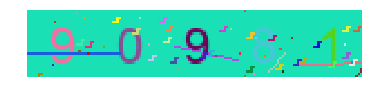

In [513]:
%matplotlib inline
import matplotlib.pyplot as plt
img = Image.open('verify.png')
plt.figure('')
plt.axis('off')
plt.imshow(img)

In [512]:
%%html
<img src="verify.png" width="40%">

### 关于函数定义中的\*args和\**kwargs
* \*args：接收多个常量输入，组成tuple返回
* \**kwargs：接收多个键值对输入，组成dict返回

In [460]:
def foo(*args, **kwargs):
    print('args = ', args)
    print('kwargs = ', kwargs)
    print('---------------------------------------')
    
if __name__ == '__main__':
    foo(1,2,3,4)
    foo(a=1,b=2,c=3)
    foo(1,2,3,4, a=1,b=2,c=3)
    foo('a', 1, None, a=1, b='2', c=3)

args =  (1, 2, 3, 4)
kwargs =  {}
---------------------------------------
args =  ()
kwargs =  {'a': 1, 'b': 2, 'c': 3}
---------------------------------------
args =  (1, 2, 3, 4)
kwargs =  {'a': 1, 'b': 2, 'c': 3}
---------------------------------------
args =  ('a', 1, None)
kwargs =  {'a': 1, 'b': '2', 'c': 3}
---------------------------------------
